# L200 Data Tutorial

The most up to date data is located at Gran Sasso on the Legend login machines. Stable productions are found at:
`/data1/shared/l60/l60-prodven-v1/prod-ref`.

## The LEGEND Production Environment

A full set of tutorials on the production environment can be found here: https://github.com/mmatteo/legend-analysis-tutorials (probably out of date and need updating). 
The github page which provides more detail on all the commands is here: https://github.com/legend-exp/legend-prodenv .

Once you have navigated to the production environment at `/data1/shared/l60/l60-prodven-v1` , the setup file can be sourced using:

`source setup.sh`

This gives access to all the prodenv commands a full description of which are found above.

To load the software for this production cycle we can use:
`prodenv-load.sh config.json "command to run e.g. jupyter notebook"`

This will put us in the container for this environment with the version of pygama the data was made using.

## At Nersc

If running this tutorial at nersc a file of dsp data containing a single channel has been copied over to look at.

## A Production Cycle

By default there are 4 directories in each production cycle. 

dataflow contains all the snakmake code which controls the data production

generated is where all the data produced is stored, this includes both the tier data and par data as well as plots and the logs.

inputs contains all the config files and the par overwrites 

software contains all the other software such as the pygama version.

## Data Fields

Tier1 data contains the following fields:

```console
$ channel/raw
└── raw
     ├── baseline    # FPGA-estimated baseline
     ├── card
     ├── ch_orca
     ├── channel     # right now, index of the trigger (trace)
     ├── crate
     ├── daqenergy      # FPGA-estimated energy
     ├── deadtime
     ├── dr_maxticks
     ├── dr_start_pps
     ├── dr_start_ticks
     ├── dr_stop_pps
     ├── dr_stop_ticks
     ├── eventnumber
     ├── fcid
     ├── numtraces   # number of triggered FADC channels
     ├── packet_id   # packet index in file
     ├── runtime
     ├── timestamp   # time since beginning of file
     ├── to_abs_mu_usec
     ├── to_dt_mu_usec
     ├── to_master_sec
     ├── to_mu_sec
     ├── to_mu_usec
     ├── to_start_sec
     ├── to_start_usec
     ├── tracelist   # list of triggered FADC channels
     ├── ts_maxticks
     ├── ts_pps
     ├── ts_ticks
     └── waveform    # digitizer data
         ├── dt      # sampling period (ns) - 16
         ├── t0
         └── values  # array holding the waveform samples FADC units

```

Whereas tier 2 contains a few more:

```console
$ dps.lh5
├── dsp_info
└── raw
     ├── A_max
     ├── QDrift
     ├── bl_intercept
     ├── bl_mean
     ├── bl_slope
     ├── bl_std
     ├── cuspEftp
     ├── cuspEmax
     ├── dt_eff
     ├── pz_mean
     ├── pz_slope
     ├── pz_std
     ├── tp_01
     ├── tp_0_est
     ├── tp_0_trap
     ├── tp_10
     ├── tp_100
     ├── tp_20
     ├── tp_50
     ├── tp_80
     ├── tp_90
     ├── tp_95
     ├── tp_99
     ├── tp_aoe_max
     ├── tp_aoe_samp
     ├── tp_max
     ├── tp_min
     ├── trapEftp
     ├── trapEmax
     ├── trapTmax
     ├── wf_max
     ├── wf_min
     ├── zacEftp
     ├── zacEmax
```

A full description of how all this data was produced can be found here: https://indico.legend-exp.org/event/698/contributions/3409/attachments/1852/2844/Processing_Chain_lnote_v1.pdf

bl_mean, bl_slope, bl_std, bl_intercept are parameters related to the baseline namely the mean, RMS, slope and intercept.

pz_mean, pz_slope, pz_std are the same but for the flat top

tp_01, tp_0_est, tp_0_trap, tp_10, tp_100, tp_20, tp_50, tp_80, tp_90, tp_95, tp_99, tp_max, tp_min are all timepoint parameters. tp_0_est and tp_0_trap are two different estimates of the start point of the signal. All others are times to reach the relevant percentage of the energy. tp_max and tp_min are the timepoints of the max and min of the waveform respectively. Finally tp_aoe_samp is the time the current is maximised and tp_aoe_max is the time in the windowed waveform.

cuspEftp,  cuspEmax, 
trapEftp,  trapEmax, trapTmax, 
zacEftp,  zacEmax
are all energy estimates. There are three different filter trap, zac and cusp. All filters have been optimised.
For each we have 2 different extraction methods the max and fixed time pickoff (ftp). 
For the moment I would recommend using the max as the ftp has not been fully investigated yet.
trapTmax is a fixed length trap filter used for timing estimates.

Other parameters:
A_max  is the max current, 
QDrift is a parameter related to the uncollected charge. When divided by the energy (trapTmax) we get an effective drift time, dt_eff.
Finally wf_max and wf_min are the max and min of the waveform.

## Loading in Data

Load in packages

In [1]:
import pygama.lgdo.lh5_store as lh5
import os,json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

### At LNGS

In [25]:
datatype = 'cal'
run = 'r022'
tier = 'dsp'
datapath = f'/data1/shared/l60/l60-prodven-v1/prod-ref/v05.00/generated/tier/{tier}/{datatype}/p01/{run}/'

In [26]:
files      = os.listdir(datapath)
files.sort()
for i,file in enumerate(files):
    files[i] = os.path.join(datapath,file)
files = files[0:5]

### At NERSC

In [ ]:
# Note this file only has a single channel in it as an example
files = ['/global/cfs/cdirs/m2676/data/l60-dsp-example.lh5']

In [27]:
sto=lh5.LH5Store()

We can use this command to check what is in the file

In [28]:
lh5.ls(files[0], 'ch003/dsp/')

['ch002/dsp/A_max',
 'ch002/dsp/QDrift',
 'ch002/dsp/bl_intercept',
 'ch002/dsp/bl_mean',
 'ch002/dsp/bl_slope',
 'ch002/dsp/bl_std',
 'ch002/dsp/cuspEftp',
 'ch002/dsp/cuspEmax',
 'ch002/dsp/dt_eff',
 'ch002/dsp/pz_mean',
 'ch002/dsp/pz_slope',
 'ch002/dsp/pz_std',
 'ch002/dsp/tp_01',
 'ch002/dsp/tp_0_est',
 'ch002/dsp/tp_10',
 'ch002/dsp/tp_100',
 'ch002/dsp/tp_20',
 'ch002/dsp/tp_50',
 'ch002/dsp/tp_80',
 'ch002/dsp/tp_90',
 'ch002/dsp/tp_95',
 'ch002/dsp/tp_99',
 'ch002/dsp/tp_aoe_max',
 'ch002/dsp/tp_aoe_samp',
 'ch002/dsp/tp_max',
 'ch002/dsp/tp_min',
 'ch002/dsp/trapEftp',
 'ch002/dsp/trapEmax',
 'ch002/dsp/trapTmax',
 'ch002/dsp/wf_max',
 'ch002/dsp/wf_min',
 'ch002/dsp/zacEftp',
 'ch002/dsp/zacEmax']

Load data in

In [29]:
uncal = lh5.load_nda(files, ['cuspEmax'], 'ch003/dsp')

In [30]:
print(uncal)

{'cuspEmax': array([384.81735 , 878.0523  ,  64.41219 , ...,  63.756004, 237.84149 ,
        46.440964], dtype=float32)}


Or we can use dataframes instead:

In [33]:
df = lh5.load_dfs(files, ['cuspEmax'], 'ch003/dsp')

In [34]:
df.head()

,cuspEmax
0,384.817352
1,878.052307
2,64.412193
3,1151.412598
4,52.530148


<IPython.core.display.Javascript object>


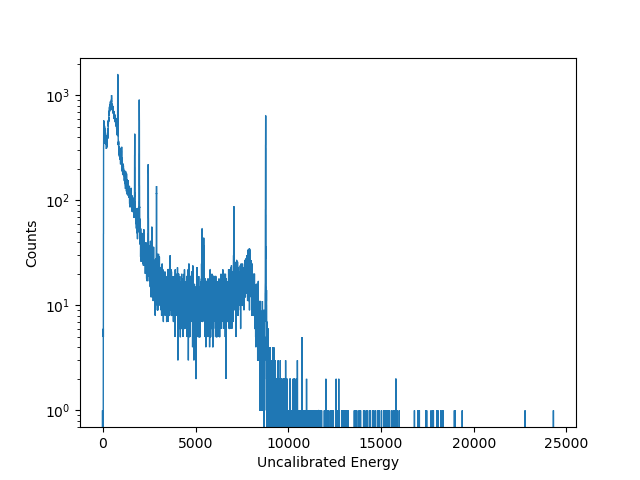

In [35]:
plt.figure()
counts,bins,bars = plt.hist(uncal['cuspEmax'], bins=10000, histtype='step')
plt.yscale('log')
plt.xlabel("Uncalibrated Energy")
plt.ylabel("Counts")
plt.show()

## Applying Energy Calibration 

In [39]:
import pygama.pargen.energy_cal as cal
import pygama.math.peak_fitting as pgf

In [40]:
glines    = [583.191, 727.330, 860.564,1592.53,1620.50,2103.53,2614.50] # gamma lines used for calibration
range_keV = [(20,20),(30,30), (30,30),(40,25),(25,40),(40,40),(60,60)] # side bands width
funcs = [pgf.extended_radford_pdf,pgf.extended_radford_pdf,pgf.extended_radford_pdf,pgf.extended_radford_pdf,
     pgf.extended_radford_pdf,pgf.extended_radford_pdf,pgf.extended_radford_pdf]
gof_funcs = [pgf.radford_pdf,pgf.radford_pdf,pgf.radford_pdf,pgf.radford_pdf,
        pgf.radford_pdf,pgf.radford_pdf,pgf.radford_pdf]

For the calibration we have to specify the peaks to find in keV. The widths around each peak to fit again in keV and finally the function to try and fit to each peak. Here we are just using the extended_radford_pdf function which is a gaussian with low energy tail and a step function for the background. We also specify the function used for calculating the goodness of fit which is the same pdf just without the extended option.

A more in depth energy calibration script can be found in pygama at: https://github.com/legend-exp/pygama/blob/main/src/pygama/pargen/ecal_th.py

The other argument we have to supply is a guess on the adc to kev conversion. For Th assuming the 99th percentile is around the 2615 peak works well.

In [48]:
import logging

logging.basicConfig(level=logging.INFO)


In [49]:
pars, cov, results = cal.hpge_E_calibration(uncal['cuspEmax'],
                                            glines,
                                            (2620/np.nanpercentile(uncal['cuspEmax'],99)),
                                            deg=1,
                                            range_keV = range_keV,
                                            funcs = funcs,
                                            gof_funcs = gof_funcs,
                                            n_events=15000,
                                            allowed_p_val=0,
                                            simplex=True,
                                            verbose=False
                                            )

DEBUG:pygama.pargen.energy_cal:hpge_find_E_peaks: replacing var zeros with 1
INFO:pygama.pargen.energy_cal:6 peaks found:
INFO:pygama.pargen.energy_cal:	   Energy   | Position  
INFO:pygama.pargen.energy_cal:	0  583.191  | 1957.93
INFO:pygama.pargen.energy_cal:	1  727.33   | 2440.37
INFO:pygama.pargen.energy_cal:	2  860.564  | 2889.31
INFO:pygama.pargen.energy_cal:	3  1592.53  | 5345.06
INFO:pygama.pargen.energy_cal:	4  2103.53  | 7063.75
INFO:pygama.pargen.energy_cal:	5  2614.5   | 8779.09
DEBUG:pygama.pargen.energy_cal:hpge_find_E_peaks: replacing var zeros with 1
INFO:pygama.pargen.energy_cal:7 peaks obtained:
INFO:pygama.pargen.energy_cal:	   Energy   | Position  
INFO:pygama.pargen.energy_cal:	0  583.191  | 1956.05
INFO:pygama.pargen.energy_cal:	1  727.33   | 2441.01
INFO:pygama.pargen.energy_cal:	2  860.564  | 2887.68
INFO:pygama.pargen.energy_cal:	3  1592.53  | 5346.05
INFO:pygama.pargen.energy_cal:	4  1620.5   | 5442.1
INFO:pygama.pargen.energy_cal:	5  2103.53  | 7063.55
INFO:p

In [53]:
ecal = pgp.poly(uncal['cuspEmax'], pars)

<IPython.core.display.Javascript object>


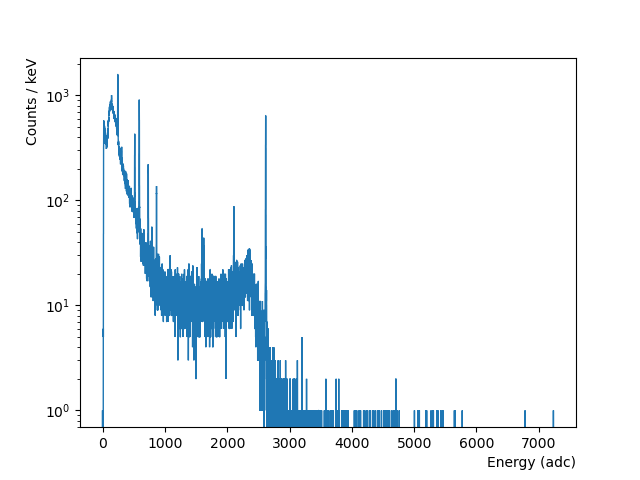

In [54]:
plt.figure()
plt.hist(ecal, bins=10000, histtype='step')
plt.xlabel("Energy (adc)",     ha='right', x=1)
plt.ylabel("Counts / keV",     ha='right', y=1)
plt.yscale('log')
plt.show()

Some tips: if the routine is struggling to find the peaks then the issue is probably the guess parameter. Here this is specified as `(2600/np.nanpercentile(uncal_pass['cuspEmax'],99))` where we are guessing that the 99th percentile is around the 2615 peak. This works well for Th but will need different values for other sources. If the peak fitting is struggling try changing the fit widths in the range_keV above.

The results is a dictionary  containing the location of the found peaks in adc and kev, the location of the fitted peaks in kev and the parameters of the fitted peaks. Finally there is the calibration parameters and the fwhms of the peaks.

In [55]:
print(results)

{'got_peaks_locs': array([1956.0488, 2441.0063, 2887.6775, 5346.049 , 5442.1   , 7063.5503,
       8779.037 ], dtype=float32), 'got_peaks_keV': array([ 583.191,  727.33 ,  860.564, 1592.53 , 1620.5  , 2103.53 ,
       2614.5  ]), 'pk_pars': array([[4828.577168341304, 1957.2116226460732, 5.612859119768233,
        0.06076774271757909, 0.03516356053791532, 3432.3591322243446,
        -0.05650352132653814],
       [1092.8217466185472, 2441.593980823801, 5.836157050899346,
        0.9894747364720551, 0.5874246443143178, 2218.1545860973247,
        -0.06631545708222228],
       [741.2470324198754, 2889.4711769839646, 5.344636252036482,
        0.32285851212051647, 7.191016251921459, 1490.6905016272144,
        0.010012660153783355],
       [284.6192752837967, 5348.3996985061, 5.057223591204746,
        0.33738202930895267, 23.955587507920388, 1012.3806780895029,
        0.10086055897825878],
       [197.48059025188635, 5439.563689972644, 6.968419706574335,
        4.519204051667492e-06, 7.1

In general we can just load the energy calibration constants from the par files or use the hit files where the energy calibration has already been done.  (Add hit files here when stable)

## Peak Fitting

### Note this section will change soon with the refactor of the math directory

In pygama there are a number of convenience functions for histogramming and peak fitting. 

In [57]:
import pygama.math.histogram as pgh

First we can use the get_hist function to generate the histogram. There are a number of ways to do this you can either specify the number of bins, the edges of the bins or the range and width of the bins.

In [58]:
hist,bins,var = pgh.get_hist(ecal[(ecal>2554)&(ecal<2664)], range=(2554,2664), dx=0.1)

The fitting function is fit_binned. It takes in the function to fit, the data and then a parameter guess to start the fitting. It can also take bounds on these parameters. For energy fitting guessing functions have been implemented so we will use these. By default it fits with an extended log likelihood fit which uses a cdf to fit. We'll use least squares as the cost function here for simplicity.

We will use again the radford pdf function to fit which is a gaussian with a tail and a step. A number of other peak shapes are implemented in pygama and can be found [here](https://github.com/legend-exp/pygama/blob/main/src/pygama/math/peak_fitting.py). For this fit function, initial guesses have been implemented so we will use these.

In [62]:
pars_guess = cal.get_hpge_E_peak_par_guess(hist, bins, var, pgp.radford_pdf)
bounds = cal.get_hpge_E_bounds(pgp.radford_pdf)
fixed = cal.get_hpge_E_fixed(pgp.radford_pdf)

In [65]:
pars,errs, covs = pgp.fit_binned(pgf.radford_pdf, hist,bins, guess=pars_guess, 
                           bounds=bounds, fixed =fixed, cost_func='Least Squares')

<IPython.core.display.Javascript object>


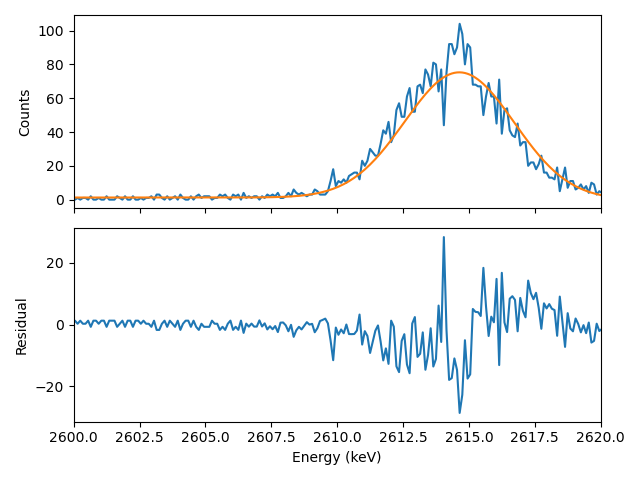

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


In [66]:
bin_cs = (bins[1:]+bins[:-1])/2
plt.figure()
ax1 = plt.subplot(211)
plt.xlim([2600,2620])
ax1.tick_params('x', labelbottom=False)
plt.plot(bin_cs,hist)
plt.plot(bin_cs,pgf.radford_pdf(bin_cs, *pars))
plt.ylabel("Counts")
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(bin_cs,pgf.radford_pdf(bin_cs, *pars)-hist)

plt.xlabel("Energy (keV)")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

If using other fit functions there are a number of other helpful functions in pygama to guess parameter values. If fitting a gaussian we can use gauss_mode_width_max to guess the mu, sigma and max. 

In [67]:
g_pars, g_covs = pgp.gauss_mode_width_max(hist,bins)

In [68]:
print(f'Mu guess is {g_pars[0]}, fitted is {pars[0]}')
print(f'Sigma guess is {g_pars[1]}, fitted is {pars[1]}')
print(f'Max guess is {g_pars[2]}, fitted is {pars[-1]}')

Mu guess is 2614.645933523055, fitted is 4230.0
Sigma guess is 0.31488934852795275, fitted is 2614.64990234375
Max guess is 100.81954849427481, fitted is 0.0
